## **Brain Cancer Dataset**

In [1]:
#include libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#load data and checking contents
data = pd.read_csv("DT-BrainCancer.csv")
print(data)

#check for null values
print("\nChecking NULL values:\n",data.isnull().sum())

    Unnamed: 0     sex   diagnosis             loc  ki    gtv  status
0            1  Female  Meningioma  Infratentorial  90   6.11       0
1            2    Male   HG glioma  Supratentorial  90  19.35       1
2            3  Female  Meningioma  Infratentorial  70   7.95       0
3            4  Female   LG glioma  Supratentorial  80   7.61       1
4            5    Male   HG glioma  Supratentorial  90   5.06       1
..         ...     ...         ...             ...  ..    ...     ...
83          84    Male   HG glioma  Supratentorial  80   0.16       1
84          85    Male   HG glioma  Supratentorial  80  19.81       1
85          86    Male  Meningioma  Supratentorial  90   2.50       0
86          87    Male  Meningioma  Supratentorial  90   2.02       0
87          88    Male       Other  Infratentorial  80   0.11       0

[88 rows x 7 columns]

Checking NULL values:
 Unnamed: 0    0
sex           0
diagnosis     1
loc           0
ki            0
gtv           0
status        0
d

In [43]:
#preprocessing data
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)
print("\n")

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print(data)

Categorical Columns: []


    Unnamed: 0  ki    gtv  status  sex_Male  diagnosis_LG glioma  \
0            1  90   6.11       0     False                False   
1            2  90  19.35       1      True                False   
2            3  70   7.95       0     False                False   
3            4  80   7.61       1     False                 True   
4            5  90   5.06       1      True                False   
..         ...  ..    ...     ...       ...                  ...   
83          84  80   0.16       1      True                False   
84          85  80  19.81       1      True                False   
85          86  90   2.50       0      True                False   
86          87  90   2.02       0      True                False   
87          88  80   0.11       0      True                False   

    diagnosis_Meningioma  diagnosis_Other  loc_Supratentorial  
0                   True            False               False  
1                  False     

In [3]:
#selecting target variable and features
X = data.drop(['status','Unnamed: 0'], axis = 1)
y = data['status']

#splitting data for training, validating and testing
X_train = X.iloc[:61]
X_validation = X.iloc[61:74]
X_test = X.iloc[74:]
print(X_validation)
y_train = y.iloc[:61]
y_validation = y.iloc[61:74]
y_test = y.iloc[74:]

     ki    gtv  sex_Male  diagnosis_LG glioma  diagnosis_Meningioma  \
61   80  11.51      True                False                  True   
62   40  22.87     False                False                 False   
63   80   4.77      True                False                  True   
64   80   9.58      True                 True                 False   
65  100   4.00     False                False                  True   
66   80   7.59     False                False                 False   
67   70   0.01      True                False                 False   
68   80   6.93     False                False                  True   
69   70   3.63     False                False                  True   
70   70   8.45      True                False                  True   
71   80  20.93      True                False                  True   
72   90   2.64      True                 True                 False   
73   80   0.19     False                False                 False   

    d

### **Evaluation Metrics**

In [49]:
#Accuracy
def calc_accuracy(y_true, y_pred):
  correct = 0
  total = len(y_true)

  for true_label, predicted_label in zip(y_true, y_pred):
    if true_label == predicted_label:
      correct += 1

  accuracy = correct / total
  return accuracy

#Confusion Matrix
def confusion_matrix(y_true, y_pred):
  TN, TP, FN, FP = 0, 0, 0, 0

  for true_label, predicted_label in zip(y_true, y_pred):
    if true_label == 0 and predicted_label == 0:
      TN += 1
    elif true_label == 0 and predicted_label == 1:
      FP += 1
    elif true_label == 1 and predicted_label == 0:
      FN += 1
    elif true_label == 1 and predicted_label == 1:
      TP += 1

  return (TN, TP, FN, FP)

#Precision
def precision(y_true, y_pred):
  true_positives = 0
  false_positives = 0

  for true, pred in zip(y_true, y_pred):
    if true == 1 and pred == 1:
      true_positives += 1
    elif true == 0 and pred == 1:
      false_positives += 1

  if true_positives + false_positives == 0:
    precision = 0.0
  else:
    precision = true_positives / (true_positives + false_positives)

  return precision


#Recall
def recall(y_true, y_pred):
  true_positives = 0
  false_negatives = 0

  for true, pred in zip(y_true, y_pred):
    if true == 1 and pred == 1:
      true_positives += 1
    elif true == 1 and pred == 0:
      false_negatives += 1

  if true_positives + false_negatives == 0:
    recall = 0.0
  else:
    recall = true_positives / (true_positives + false_negatives)

  return recall

#F1-Score
def f1(precision, recall):
  f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

  return f1_score


### **Decision Tree**

In [50]:
#Training the dataset
from sklearn.tree import DecisionTreeClassifier

#Define the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

dt = dt_classifier.fit(X_train, y_train)

Accuracy:  0.5384615384615384
Precision:  0.4444444444444444
Recall:  0.8
F1-Score:  0.5714285714285714
Confusion Matrix:
TN: 3   FP: 5
FN: 1   TP: 4



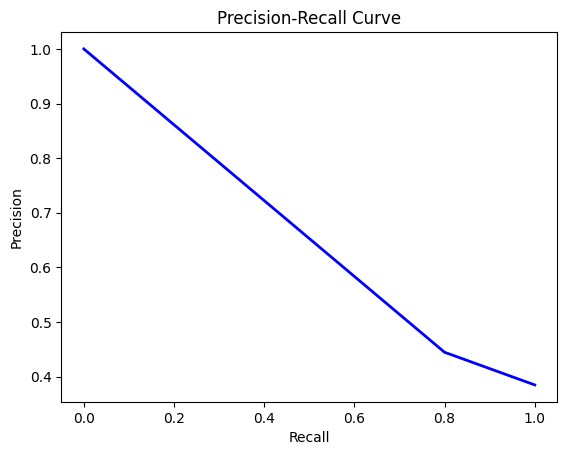

In [56]:
#Validating the model using validation set
y_pred = dt.predict(X_validation)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

from sklearn.metrics import precision_recall_curve

pv, rv, _ = precision_recall_curve(y_validation, y_pred)
plt.plot(rv, pv, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [59]:
#Validating
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for grid search
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Initialize GridSearchCV with cross-validation (e.g., 5-fold)
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit GridSearchCV on the combined training and validation sets
X_train_new = X.iloc[:74]
y_train_new = y.iloc[:74]
grid_search.fit(X_train_new, y_train_new)

# Get the best model on the test set
best_dt_model = grid_search.best_estimator_

print(best_dt_model)

DecisionTreeClassifier(max_depth=3, min_samples_split=5)


Accuracy:  0.6153846153846154
Precision:  0.5
Recall:  0.6
F1-Score:  0.5454545454545454
Confusion Matrix:
TN: 5   FP: 3
FN: 2   TP: 3


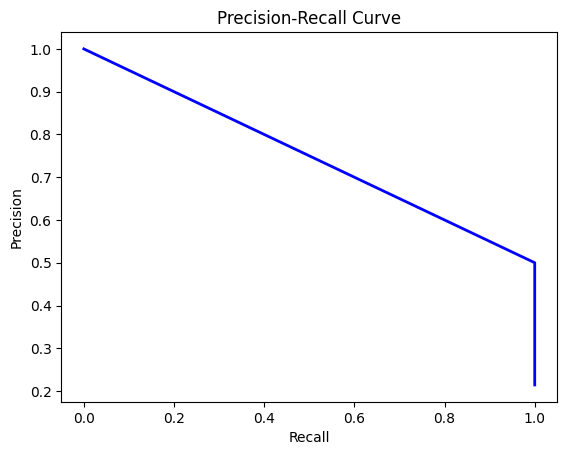

In [60]:
#Testing best model using test set
y_pred = best_dt_model.predict(X_test)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

from sklearn.metrics import precision_recall_curve

pv, rv, _ = precision_recall_curve(y_test, y_pred)
plt.plot(rv, pv, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

### **XGB Classifier**

In [61]:
#Training the dataset
import xgboost as xgb

#Define the XGBClassifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

xgbc = xgb_classifier.fit(X_train, y_train)

Accuracy:  0.5384615384615384
Precision:  0.4444444444444444
Recall:  0.8
F1-Score:  0.5714285714285714
Confusion Matrix:
TN: 3   FP: 5
FN: 1   TP: 4


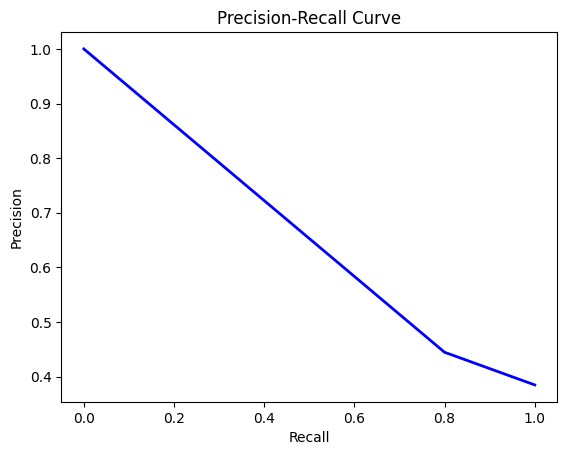

In [63]:
#Validating the model using validation set
y_pred = dt.predict(X_validation)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

from sklearn.metrics import precision_recall_curve

pv, rv, _ = precision_recall_curve(y_validation, y_pred)
plt.plot(rv, pv, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [64]:
#Validating
#Define the hyperparameter grid for grid searching
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300]
}

grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_new, y_train_new)

# Get the best XGBClassifier model from GridSearchCV
best_xgb_model = grid_search.best_estimator_

print(best_xgb_model)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)


Accuracy:  0.5384615384615384
Precision:  0.42857142857142855
Recall:  0.6
F1-Score:  0.5
Confusion Matrix:
TN: 4   FP: 4
FN: 2   TP: 3


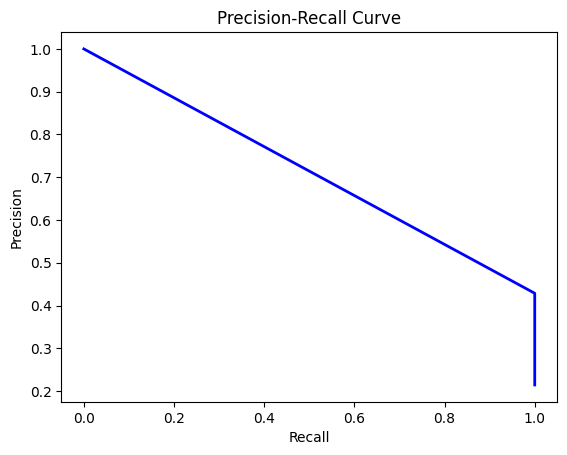

In [65]:
#Testing best model using test set
y_pred = best_xgb_model.predict(X_test)

acc = calc_accuracy(y_validation, y_pred)
print("Accuracy: ", acc)
prec = precision(y_validation, y_pred)
print("Precision: ", prec)
rec = recall(y_validation, y_pred)
print("Recall: ", rec)
f1_score = f1(prec, rec)
print("F1-Score: ", f1_score)
TN, TP, FN, FP = confusion_matrix(y_validation, y_pred)
print("Confusion Matrix:")
print(f"TN: {TN}   FP: {FP}")
print(f"FN: {FN}   TP: {TP}")

from sklearn.metrics import precision_recall_curve

pv, rv, _ = precision_recall_curve(y_test, y_pred)
plt.plot(rv, pv, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()